# Tools & Libraries

In [13]:
# make imports from pa_lib possible (parent directory of file's directory)
import sys
from pathlib import Path

file_dir = Path.cwd()
print(file_dir)
parent_dir = file_dir.parent
print(parent_dir)
sys.path.append(str(parent_dir))

C:\Users\stc\Documents\GitHub\PredictiveAnalyticsPython\stc
C:\Users\stc\Documents\GitHub\PredictiveAnalyticsPython


In [14]:
from pa_lib.job import request_job
from pa_lib.file import project_dir, load_bin
from pa_lib.data import desc_col

In [15]:
import pandas as pd
import numpy as np

# Recursive job request & data import

In [16]:
request_job(
    job_name="ek_info_prepare.py",
    current="This Week",
    # current = "Today"
)

request_job(
    job_name="crm_prepare.py",
    current="This Week",
    # current="Today",
)

request_job(
    job_name="bd_prepare.py",
    current="This Week",
    # current = "Today"
)

09:44:53 [INFO] [ipykernel_launcher.py] requests 'ek_info_prepare.py'
09:44:53 [INFO] [ipykernel_launcher.py]: Not running job 'ek_info_prepare.py': result is current ('This Week') from 2020-01-27 09:36:09.507163.
09:44:53 [INFO] [ipykernel_launcher.py] requests 'crm_prepare.py'
09:44:53 [INFO] [ipykernel_launcher.py]: Not running job 'crm_prepare.py': result is current ('This Week') from 2020-01-27 09:05:12.898621.
09:44:53 [INFO] [ipykernel_launcher.py] requests 'bd_prepare.py'
09:44:53 [INFO] [ipykernel_launcher.py]: Not running job 'bd_prepare.py': result is current ('This Week') from 2020-01-27 09:31:57.528900.


In [17]:
with project_dir("vkprog"):
    # Customer information 
    ek_info = load_bin("ek_info.feather")
    bd_df_raw = load_bin("bd_data.feather")
    crm_df_raw = load_bin("crm_data_vkprog.feather")

09:44:53 [INFO] Started loading binary file ...
09:44:53 [INFO] Reading from file C:\Users\stc\data\vkprog\ek_info.feather
09:44:54 [INFO] ... finished loading binary file in 0.04s (0.03s CPU)
09:44:54 [INFO] Started loading binary file ...
09:44:54 [INFO] Reading from file C:\Users\stc\data\vkprog\bd_data.feather
09:44:54 [INFO] ... finished loading binary file in 0.16s (0.81s CPU)
09:44:54 [INFO] Started loading binary file ...
09:44:54 [INFO] Reading from file C:\Users\stc\data\vkprog\crm_data_vkprog.feather
09:44:54 [INFO] ... finished loading binary file in 0.21s (0.2s CPU)


# Data Exploration

In [18]:
# Set how many columns to display:
pd.options.display.max_columns = 100

## `ek_info`

In [19]:
ek_info.shape # (#rows, #columns)

(32737, 40)

In [20]:
desc_col(ek_info)

,DTYPE,NULLS,UNIQUE
index,int64,0/32737,32737
Endkunde_NR,int64,0/32737,32737
Endkunde,object,0/32737,30764
EK_Aktiv,int64,0/32737,2
EK_Kam_Betreut,int64,0/32737,2
EK_Land,object,49/32688,45
PLZ,int64,0/32737,2896
GEMEINDE,object,49/32688,3023
Agentur,object,21336/11401,3287
EK_BG,object,1893/30844,83


In [21]:
ek_info.head(5)

,index,Endkunde_NR,Endkunde,EK_Aktiv,EK_Kam_Betreut,EK_Land,PLZ,GEMEINDE,Agentur,EK_BG,EK_BG_ID,Auftrag_BG_ID,Auftrag_BG_Anz,Last_Res_Date,First_Res_Year,Last_Res_Year,Last_Aus_Date,EK_HB_Apg_Kurzz,AG_Hauptbetreuer,KANTON,BEZIRK,REGION,GROSSREGION,VERKAUFS_GEBIETS_CODE,VB_VKGEB,Letzter_Kontakt,Kanal,Betreff,last_CRM_Ktkt_date,VB_FILTER_VON,VB_FILTER_BIS,Letzte_CRM_Ktkts,Datum_Letzter_Ktkt,Net_2016,Net_2017,Net_2018,Net_2019,Net_2020,letzte_VBs,Insolvenz
0,0,100034,Maurer + Salzmann AG,1,0,SCHWEIZ,8408,Winterthur,ACE 2 ACE outdoor media ag,WG - Dienstleistung,720,"720,405,400,295",4,2019-10-28,2009,2019,2019-11-18,ACO,NYI,ZH,Winterthur,Winterthur,Region Zürich,V-O02,ACO,ACO,Besuch,KMU Forum Winterthur / Networking Event - Aust...,2019-11-29,NaT,NaT,"LAH,JAU,LSC,IWI,MBU,ACO",2019-11-29,36496.0,28648.0,15037.0,7231.0,0.0,NYI,None
1,1,100039,Bank BSU Genossenschaft,1,0,SCHWEIZ,8610,Uster,"walder, werber werbeagentur ag",WG - Finanzwirtschaft,470,"470,720",2,2019-12-01,2009,2019,2020-03-01,MBU,CGA,ZH,Uster,Uster–Dübendorf,Region Zürich,V-O03,MBU,MBU,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2019-10-25,NaT,NaT,"AKU,HUL,CGA,LSC,IWI,MBU",2019-10-25,25730.0,38960.0,17853.0,17450.0,0.0,"MBU,CGA",None
2,2,100061,Mundwiler Juwelen AG,1,0,SCHWEIZ,8400,Winterthur,None,WG - Persönlicher Bedarf,555,555,1,2009-09-16,2009,2009,2009-10-12,ACO,None,ZH,Winterthur,Winterthur,Region Zürich,V-O02,ACO,ACO,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2019-10-26,NaT,NaT,"BAF,JAU,LSC,IWI,ACO",2019-10-26,NaN,NaN,NaN,NaN,NaN,None,None
3,3,100064,Senn Communication,1,0,SCHWEIZ,8610,Uster,None,WG - Dienstleistung,720,"901,960",2,2017-03-09,2009,2017,2017-07-01,MBU,None,ZH,Uster,Uster–Dübendorf,Region Zürich,V-O03,MBU,CGA,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2019-10-27,NaT,NaT,"MBU,AKU,CAS,LSC,BAF,IWI,CGA",2019-10-27,2000.0,1441.0,0.0,0.0,0.0,None,None
4,4,100066,"walder, werber werbeagentur ag",1,0,SCHWEIZ,8610,Uster,None,WG - Dienstleistung,720,"780,720",2,2019-08-23,2013,2019,2019-10-28,MBU,None,ZH,Uster,Uster–Dübendorf,Region Zürich,V-O03,MBU,JEN,E-Mail,Poster Night 2020 Save the Date - Save the Dat...,2019-12-05,NaT,NaT,"AKU,MBU,BAF,LAH,FIB,HKL,LSC,CGA,MAU,IWI,JEN,CA...",2019-12-05,0.0,0.0,1467.0,1062.0,0.0,CGA,None


## `bd_df_raw`

In [22]:
bd_df_raw.shape

(1633776, 54)

In [23]:
desc_col(bd_df_raw, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,int64,0/1633776,43312,12.5 MB,"[100034,663638]"
ENDKUNDE,category,0/1633776,40582,10.6 MB,"[ IWIKO - Institut für Wirtschafts-Komm.,ô qua..."
EK_ABC,category,5363/1628413,8,1.6 MB,"[nan,NO]"
EK_BONI,category,2408/1631368,3,1.6 MB,"[nan,keine Verkäufe]"
EK_PLZ,category,493/1633283,3536,3.5 MB,"[nan,WC2H OBA 1]"
EK_ORT,category,492/1633284,3562,3.5 MB,"[nan,genève]"
EK_LAND,category,492/1633284,60,1.6 MB,"[nan,USA]"
EK_HB_APG_KURZZ,category,73557/1560219,107,1.6 MB,"[nan,ZOL]"
EK_KAM_BETREUT,int64,0/1633776,2,12.5 MB,"[0,1]"
EK_AKTIV,int64,0/1633776,2,12.5 MB,"[0,1]"


In [24]:
bd_df_raw.head(5)

,ENDKUNDE_NR,ENDKUNDE,EK_ABC,EK_BONI,EK_PLZ,EK_ORT,EK_LAND,EK_HB_APG_KURZZ,EK_KAM_BETREUT,EK_AKTIV,AGENTUR,AG_HAUPTBETREUER,VERKAUFSBERATER,ENDKUNDE_BRANCHENGRUPPE_ID,ENDKUNDE_BRANCHENGRUPPE,ENDKUNDE_NBRANCHENGRUPPE_ID,ENDKUNDE_NBRANCHENGRUPPE,ENDKUNDE_BRANCHENKAT_ID,ENDKUNDE_BRANCHENKAT,ENDKUNDE_NBRANCHENKAT_ID,ENDKUNDE_NBRANCHENKAT,AUFTRAG_BRANCHENGRUPPE_ID,AUFTRAG_BRANCHENGRUPPE,AUFTRAG_NBRANCHENGRUPPE_ID,AUFTRAG_NBRANCHENGRUPPE,AUFTRAG_BRANCHENKAT_ID,AUFTRAG_BRANCHENKAT,AUFTRAG_NBRANCHENKAT_ID,AUFTRAG_NBRANCHENKAT,AGPS_NR,SEGMENT,KV_NR,KV_TYP,KAMPAGNEN_STATUS,KAMPAGNE_ERFASSUNGSDATUM,KAMPAGNE_BEGINN,AUFTRAGSART,RES_DAT,ANNULLATION_DATUM,AUSH_VON,DAUER,VERTRAG,BRUTTO,NETTO,AGGLO,PF,KAMP_BEGINN_JAHR,KAMP_BEGINN_KW,KAMP_BEGINN_KW_2,KAMP_BEGINN_KW_4,KAMP_ERFASS_JAHR,KAMP_ERFASS_KW,KAMP_ERFASS_KW_2,KAMP_ERFASS_KW_4
0,316770,JCDecaux Ltd.,NO,gut,W2 1YR,London,GREAT BRITAIN,DEA,1,1,JCDecaux,MAT,MAT,720,WG - Dienstleistung,NaN,NaN,15,WB - Dienstleistung,NaN,NaN,901,WG - Handel / Grossverteiler,NaN,NaN,14,WB - Handel,NaN,NaN,1040390,APG|SGA,542212,KPG,3,2008-10-13,NaT,Kommerziell,2008-10-13,2008-11-21,2009-05-04,7,Nein,0,0,"90306,90329,90404,91103,91301,91372,91407,9150...","Banner,City eBoard,City ePanel,Cube,Escalator ...",NaN,NaN,NaN,NaN,2008,42,41,41
1,316770,JCDecaux Ltd.,NO,gut,W2 1YR,London,GREAT BRITAIN,DEA,1,1,JCDecaux,MAT,MAT,720,WG - Dienstleistung,NaN,NaN,15,WB - Dienstleistung,NaN,NaN,901,WG - Handel / Grossverteiler,NaN,NaN,14,WB - Handel,NaN,NaN,1040381,APG|SGA,542212,KPG,3,2008-10-13,NaT,Kommerziell,2008-10-13,2008-11-21,2009-05-11,7,Nein,0,0,"90306,90329,90404,91103,91301,91372,91407,9150...","Banner,City eBoard,City ePanel,Cube,Escalator ...",NaN,NaN,NaN,NaN,2008,42,41,41
2,119642,Hublot SA,A,gut,1260,Nyon 2,SCHWEIZ,BEG,1,1,NaN,NaN,CRO,555,WG - Persönlicher Bedarf,NaN,NaN,04,WB - Bekleidung / persönlicher Bedarf,NaN,NaN,555,WG - Persönlicher Bedarf,NaN,NaN,04,WB - Bekleidung / persönlicher Bedarf,NaN,NaN,1041389,APG|SGA,542499,KPG,4,2008-10-13,2009-04-27,Kommerziell,2008-10-13,NaT,2009-04-27,7,Nein,3777,3210,"96300,A0230,A0261,A0351,A0371,A1061,A2701,A293...","BIG,Caisson lumineux,EntryPortal Poster,F12,F1...",2009,18,17,17,2008,42,41,41
3,119642,Hublot SA,A,gut,1260,Nyon 2,SCHWEIZ,BEG,1,1,NaN,NaN,CRO,555,WG - Persönlicher Bedarf,NaN,NaN,04,WB - Bekleidung / persönlicher Bedarf,NaN,NaN,555,WG - Persönlicher Bedarf,NaN,NaN,04,WB - Bekleidung / persönlicher Bedarf,NaN,NaN,1048493,APG|SGA,542499,KPG,4,2008-10-13,2009-04-27,Kommerziell,2008-10-24,2008-10-27,2009-04-27,14,Nein,0,0,"96300,A0230,A0261,A0351,A0371,A1061,A2701,A293...","BIG,Caisson lumineux,EntryPortal Poster,F12,F1...",2009,18,17,17,2008,42,41,41
4,136654,Vaterländische Union,E,gut,9490,Vaduz,LIECHTENSTEIN,REM,0,1,NaN,NaN,ERS,960,WG - Parteien,NaN,NaN,19,WB - Behörden / Politik,NaN,NaN,960,WG - Parteien,NaN,NaN,19,WB - Behörden / Politik,NaN,NaN,1041776,APG|SGA,542604,KPG,4,2008-10-13,2008-12-29,Politisch,2008-10-13,NaT,2008-12-29,14,Nein,4015,3011,NaN,F12,2009,1,1,1,2008,42,41,41


## `crm_df_raw`

In [25]:
crm_df_raw.shape

(921342, 14)

In [26]:
desc_col(crm_df_raw,det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
BETREFF,category,18/921324,263284,49.3 MB,"[nan,überzählige Plakate Nein zu No Billag bei..."
KANAL,category,0/921342,12,900.9 KB,"[Besprechung,Veranstaltung]"
DATUM,datetime64[ns],0/921342,2272,7.0 MB,"[2014-01-27 00:00:00,2024-10-10 00:00:00]"
QUELLE,category,0/921342,3,900.1 KB,"[Contact Center,Verkauf]"
VERANTWORTLICH,category,0/921342,277,1.8 MB,"[Admin BSI (REGION OST ZÜRICH),Zoe Neurauter (..."
KUERZEL,category,0/921342,279,1.8 MB,"[AAN,ZOL]"
ENDKUNDE_NR,category,0/921342,48853,9.2 MB,"[100034,663640]"
VB_FILTER_VON,datetime64[ns],918595/2747,19,7.0 MB,"[2019-01-01 00:00:00,2030-11-25 00:00:00]"
VB_FILTER_BIS,datetime64[ns],918941/2401,54,7.0 MB,"[2019-08-19 00:00:00,2040-04-06 00:00:00]"
VB_FILTER_GRUND,category,918857/2485,81,914.7 KB,"[nan,nur Veranstalter, kein Budget]"


In [27]:
crm_df_raw.head(5)

,BETREFF,KANAL,DATUM,QUELLE,VERANTWORTLICH,KUERZEL,ENDKUNDE_NR,VB_FILTER_VON,VB_FILTER_BIS,VB_FILTER_GRUND,YEAR,KW,KW_2,KW_4
0,Ost - Aktionen - 2014 - ACO F200 Leuchtplakate...,E-Mail,2014-10-08,Marketing,Liliane Schüpbach (REGION OST ZÜRICH),LSC,100034,NaT,NaT,NaN,2014,41,41,41
1,City ePanel Winterthur,Besuch,2014-11-03,Verkauf,Alma Coralic (REGION OST ZÜRICH),ACO,100034,NaT,NaT,NaN,2014,45,45,45
2,KMU Forum,Besuch,2014-11-27,Verkauf,Heinz Kläui (APG WINTERTHUR),HKL,100034,NaT,NaT,NaN,2014,48,47,45
3,Ost - Aktionen - 2015 - ACO_KMU Aktion_KW5-7_2015,E-Mail,2014-12-11,Marketing,Larissa Zingre (KAM ZÜRICH),LKU,100034,NaT,NaT,NaN,2014,50,49,49
4,Cafe,Besuch,2014-12-23,Verkauf,Heinz Kläui (APG WINTERTHUR),HKL,100034,NaT,NaT,NaN,2014,52,51,49


# Scribbling!

- https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt
from pa_lib.vis import boxplot_histogram

In [29]:
sns.set_style("darkgrid")

In [30]:
def fix_heatmap():
    b, t = plt.ylim()  # discover the values for bottom and top
    b += 0.5  # Add 0.5 to the bottom
    t -= 0.5  # Subtract 0.5 from the top
    plt.ylim(b, t)  # update the ylim(bottom, top) values


- That was some pre-stuff

In [41]:
pivot_df = pd.pivot_table(
    bd_df_raw.loc[bd_df_raw.KAMPAGNEN_STATUS != 3,:],  # booking data
    values="AGPS_NR",
    #index=["KAMP_ERFASS_JAHR"],
    columns=["KAMP_ERFASS_JAHR"],
    #columns=["ENDKUNDE_BRANCHENKAT"],
    index=["ENDKUNDE_BRANCHENKAT"], #
    #index=["AUFTRAG_BRANCHENKAT"],
    aggfunc=np.count_nonzero,
    fill_value=0
)

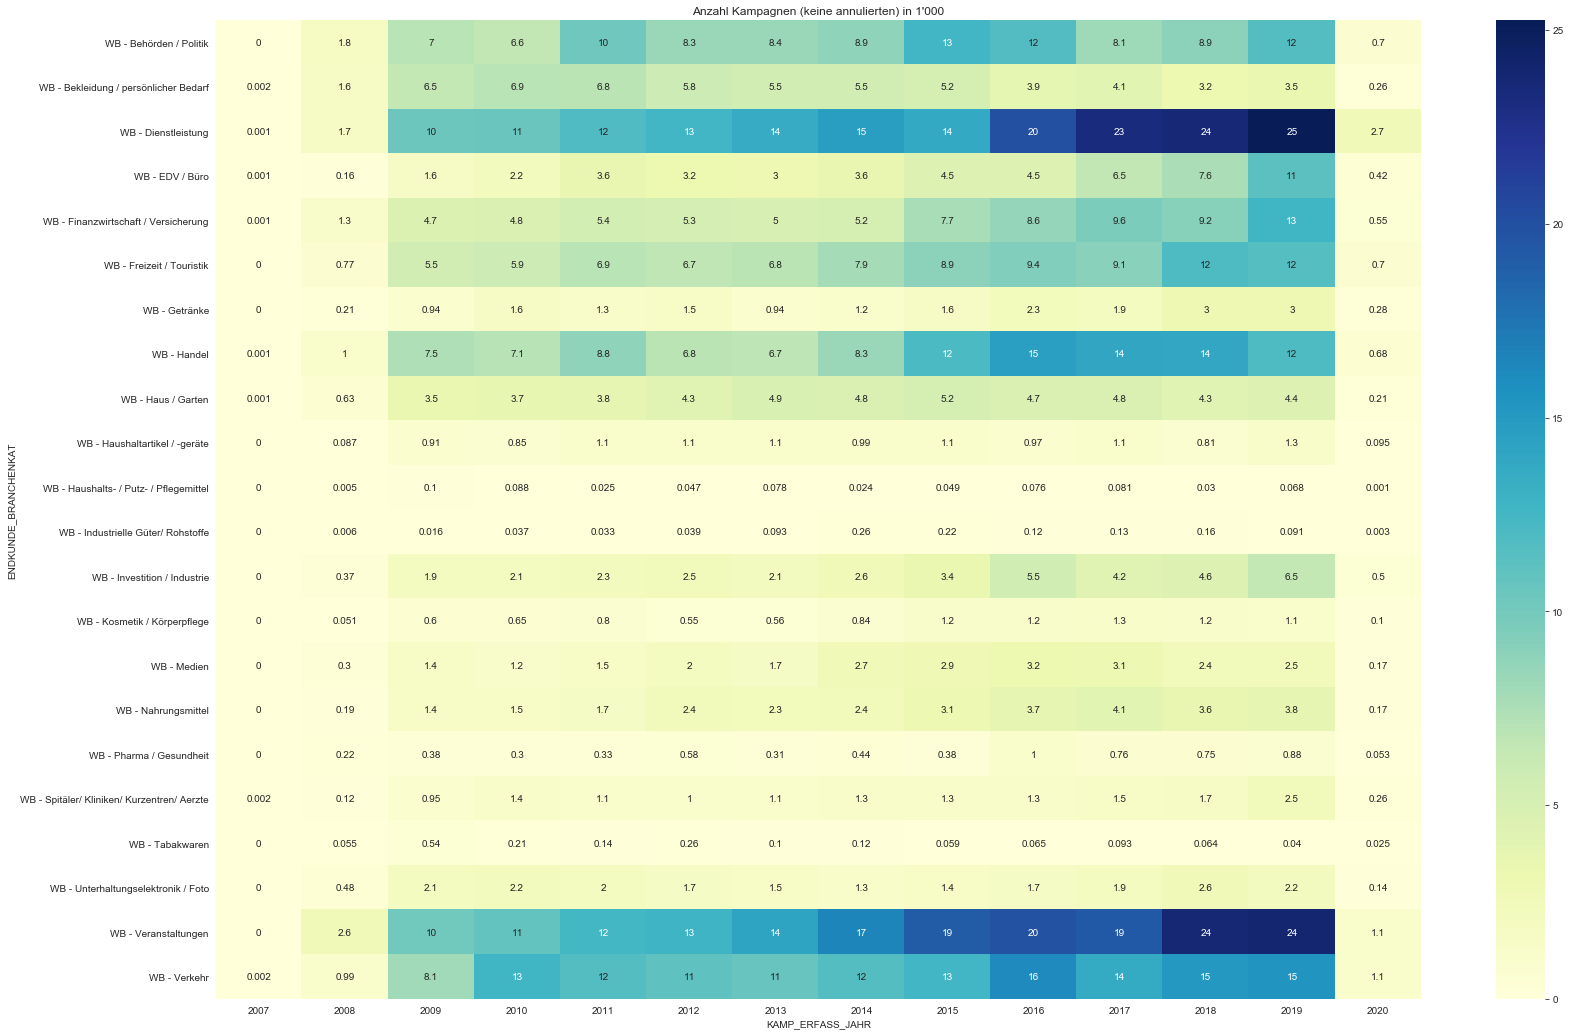

In [42]:
plt.figure(figsize=(27,18))
sns.heatmap(pivot_df.apply(lambda x: x/1000),cmap="YlGnBu", annot=True)
plt.title("Anzahl Kampagnen (keine annulierten) in 1'000")

fix_heatmap()

plt.show()  # ta-da!

VB interessieren sich dafür wo gerade kohle zu holen ist. Also vielleicht durchschnittliches Netto pro AGPS_NR durchgeben.
- WB - Verkehr
- WB - Veranstaltung
- WB - Handel
- WB - Freizeit/Touristik
- WB - Dienstleistung
- WB - Behörden/Politik


In [43]:
pivot_df = pd.pivot_table(
    bd_df_raw.loc[bd_df_raw.KAMPAGNEN_STATUS != 3,:],  # booking data
    values="NETTO",
    #index=["KAMP_ERFASS_JAHR"],
    columns=["KAMP_ERFASS_JAHR"],
    #columns=["ENDKUNDE_BRANCHENKAT"],
    index=["ENDKUNDE_BRANCHENKAT"],
    aggfunc= np.sum,
    fill_value=0
)

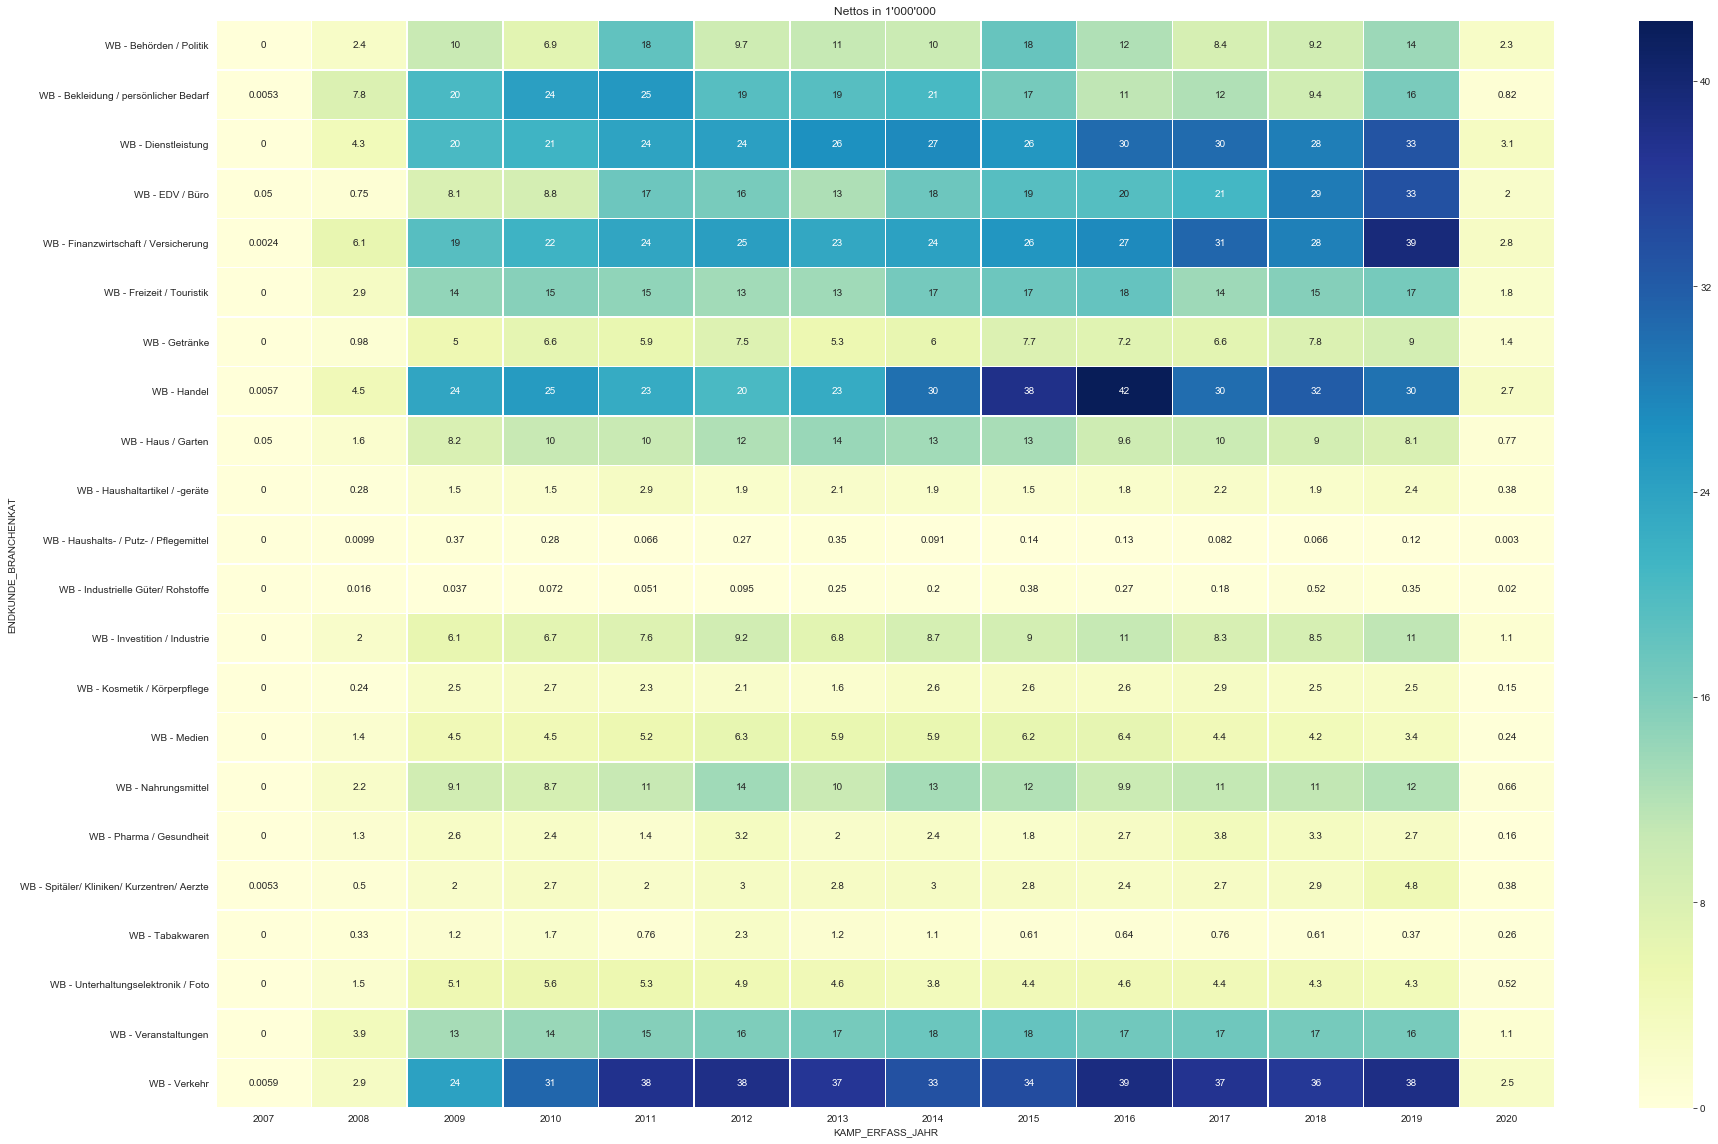

In [44]:
plt.figure(figsize=(30, 20))
sns.heatmap(
    pivot_df.apply(lambda x: x / 1000_000), cmap="YlGnBu", annot=True, linewidths=0.5
)

plt.title("Nettos in 1'000'000")

fix_heatmap()
plt.show()  # ta-da!

In [45]:
pivot_brutto_df = pd.pivot_table(
    bd_df_raw.loc[bd_df_raw.KAMPAGNEN_STATUS != 3, :],  # booking data
    values="BRUTTO",
    # index=["KAMP_ERFASS_JAHR"],
    columns=["KAMP_ERFASS_JAHR"],
    # columns=["ENDKUNDE_BRANCHENKAT"],
    index=["ENDKUNDE_BRANCHENKAT"],
    aggfunc=np.sum,
    fill_value=1,
)

pivo_netto_df = pd.pivot_table(
    bd_df_raw.loc[bd_df_raw.KAMPAGNEN_STATUS != 3, :],  # booking data
    values="NETTO",
    # index=["KAMP_ERFASS_JAHR"],
    columns=["KAMP_ERFASS_JAHR"],
    # columns=["ENDKUNDE_BRANCHENKAT"],
    index=["ENDKUNDE_BRANCHENKAT"],
    aggfunc=np.sum,
    fill_value=1,
)

pivot_df = pivot_brutto_df - pivo_netto_df

del pivot_brutto_df, pivo_netto_df

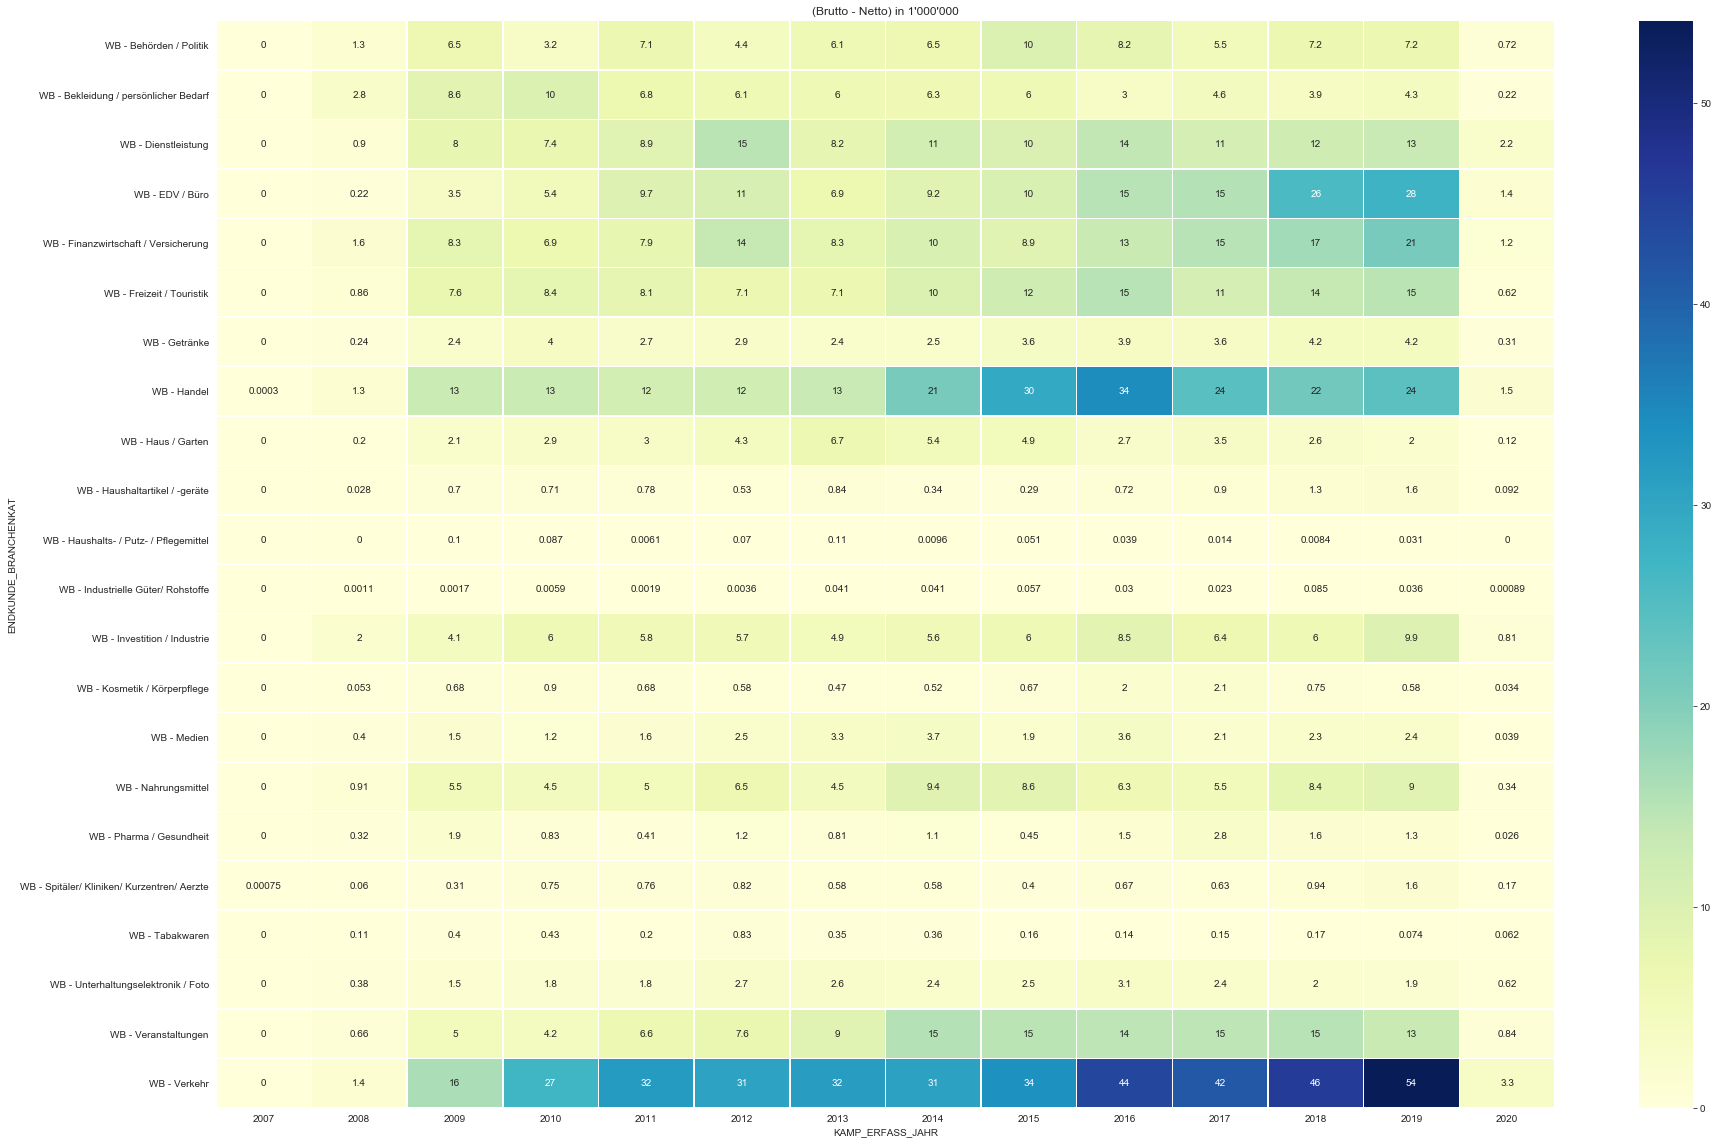

In [46]:
plt.figure(figsize=(30, 20))
sns.heatmap(
    pivot_df.apply(lambda x: x / 1_000_000), cmap="YlGnBu", annot=True, linewidths=0.5
)

plt.title("(Brutto - Netto) in 1'000'000")

fix_heatmap()

plt.show()  # ta-da!

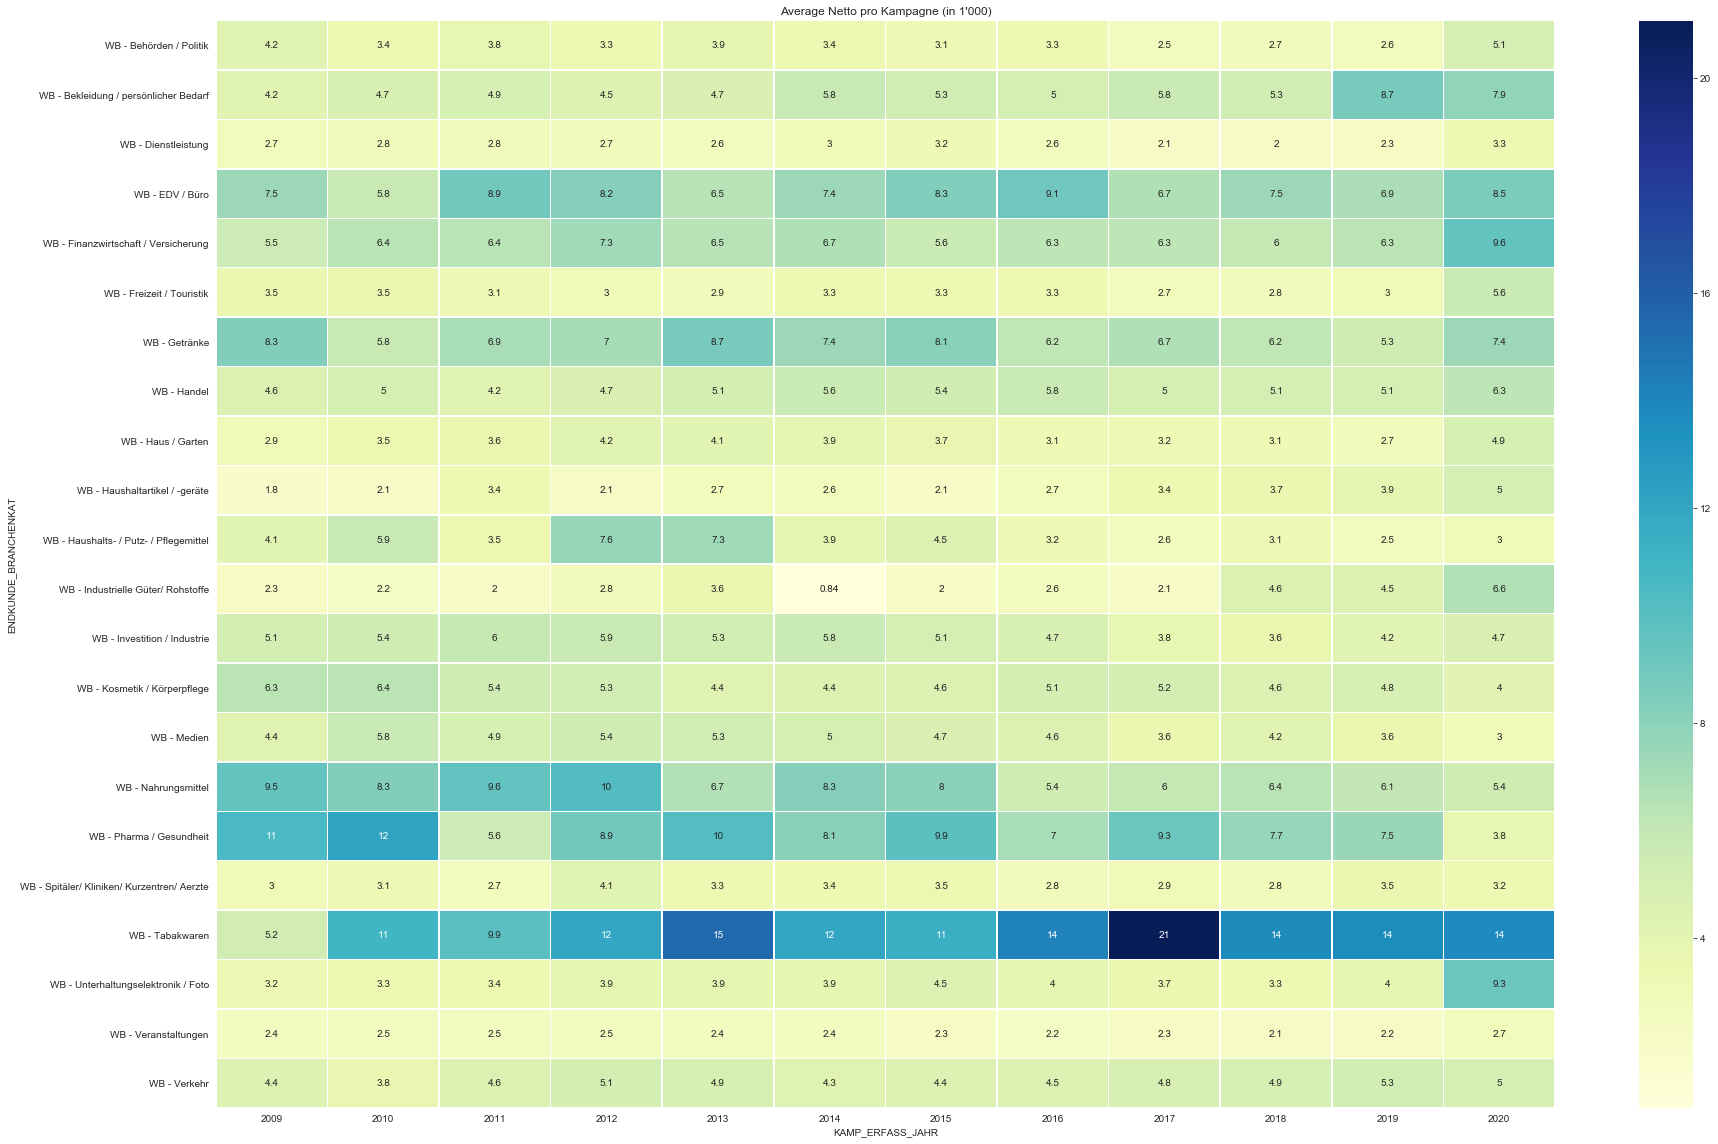

In [57]:


pivo_netto_df = pd.pivot_table(
    bd_df_raw.loc[(bd_df_raw.KAMPAGNEN_STATUS != 3) & (bd_df_raw.KAMP_ERFASS_JAHR > 2008), :],  # booking data
    values="NETTO",
    # index=["KAMP_ERFASS_JAHR"],
    columns=["KAMP_ERFASS_JAHR"],
    # columns=["ENDKUNDE_BRANCHENKAT"],
    index=["ENDKUNDE_BRANCHENKAT"],
    aggfunc=np.sum,
    fill_value=1,
)

pivo_count_df = pd.pivot_table(
    bd_df_raw.loc[(bd_df_raw.KAMPAGNEN_STATUS != 3) & (bd_df_raw.KAMP_ERFASS_JAHR > 2008), :],  # booking data
    values="NETTO",
    # index=["KAMP_ERFASS_JAHR"],
    columns=["KAMP_ERFASS_JAHR"],
    # columns=["ENDKUNDE_BRANCHENKAT"],
    index=["ENDKUNDE_BRANCHENKAT"],
    aggfunc=np.count_nonzero,
    fill_value=1,
)

pivot_df = pivo_netto_df / pivo_count_df

plt.figure(figsize=(30, 20))
sns.heatmap(
    pivot_df/1000, cmap="YlGnBu", annot=True, linewidths=0.5
)

plt.title("Average Netto pro Kampagne (in 1'000)")

fix_heatmap()

plt.show()  # ta-da!

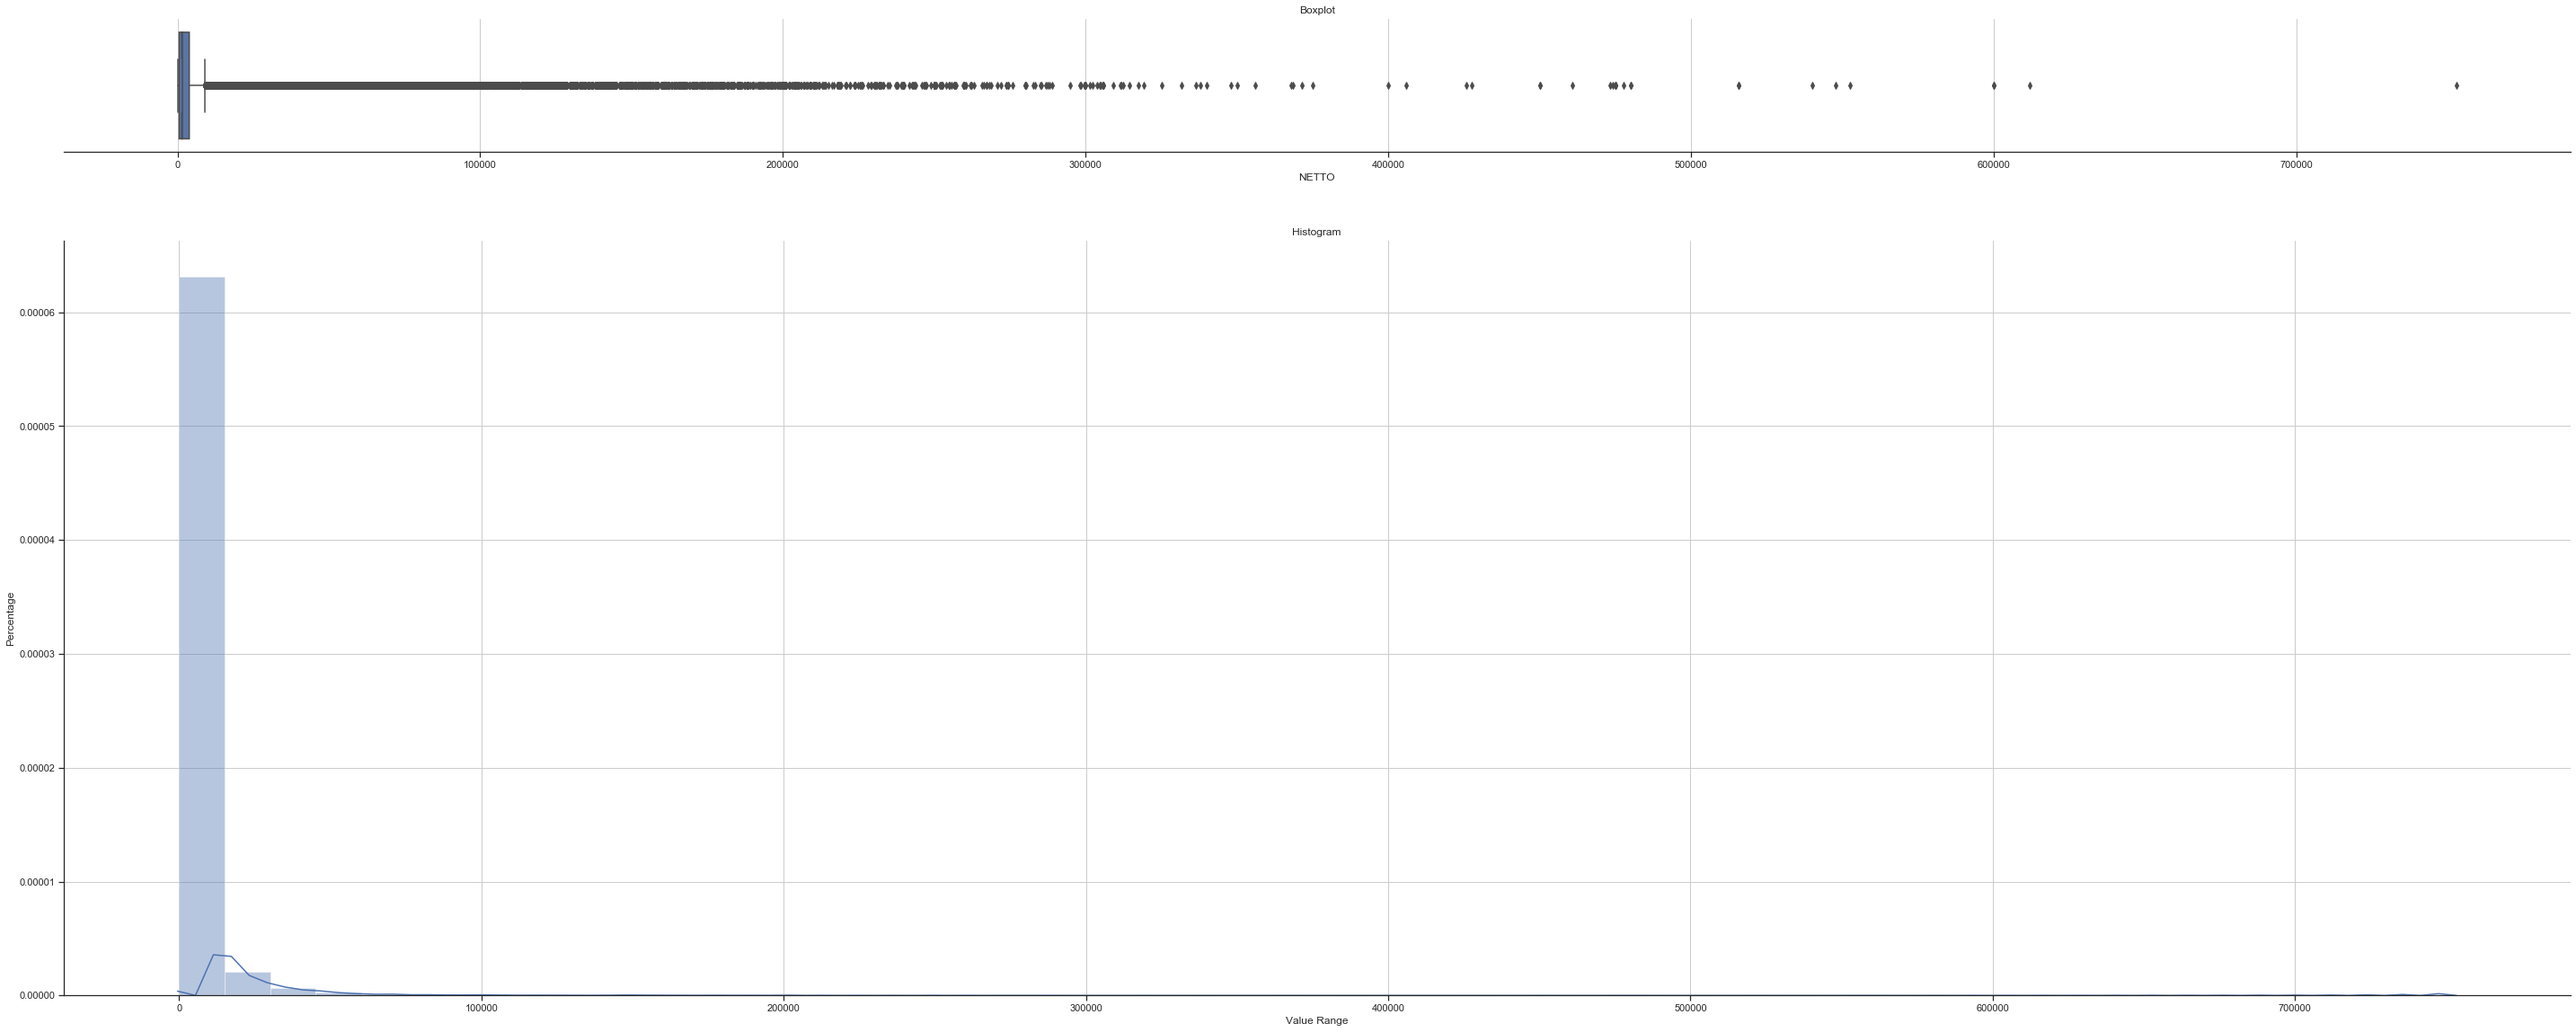

In [281]:
boxplot_histogram(
    bd_df_raw.loc[(bd_df_raw.KAMPAGNEN_STATUS != 3) & (bd_df_raw.NETTO > 0), "NETTO"],
    figsize=(50, 20),
    bins=50,
)

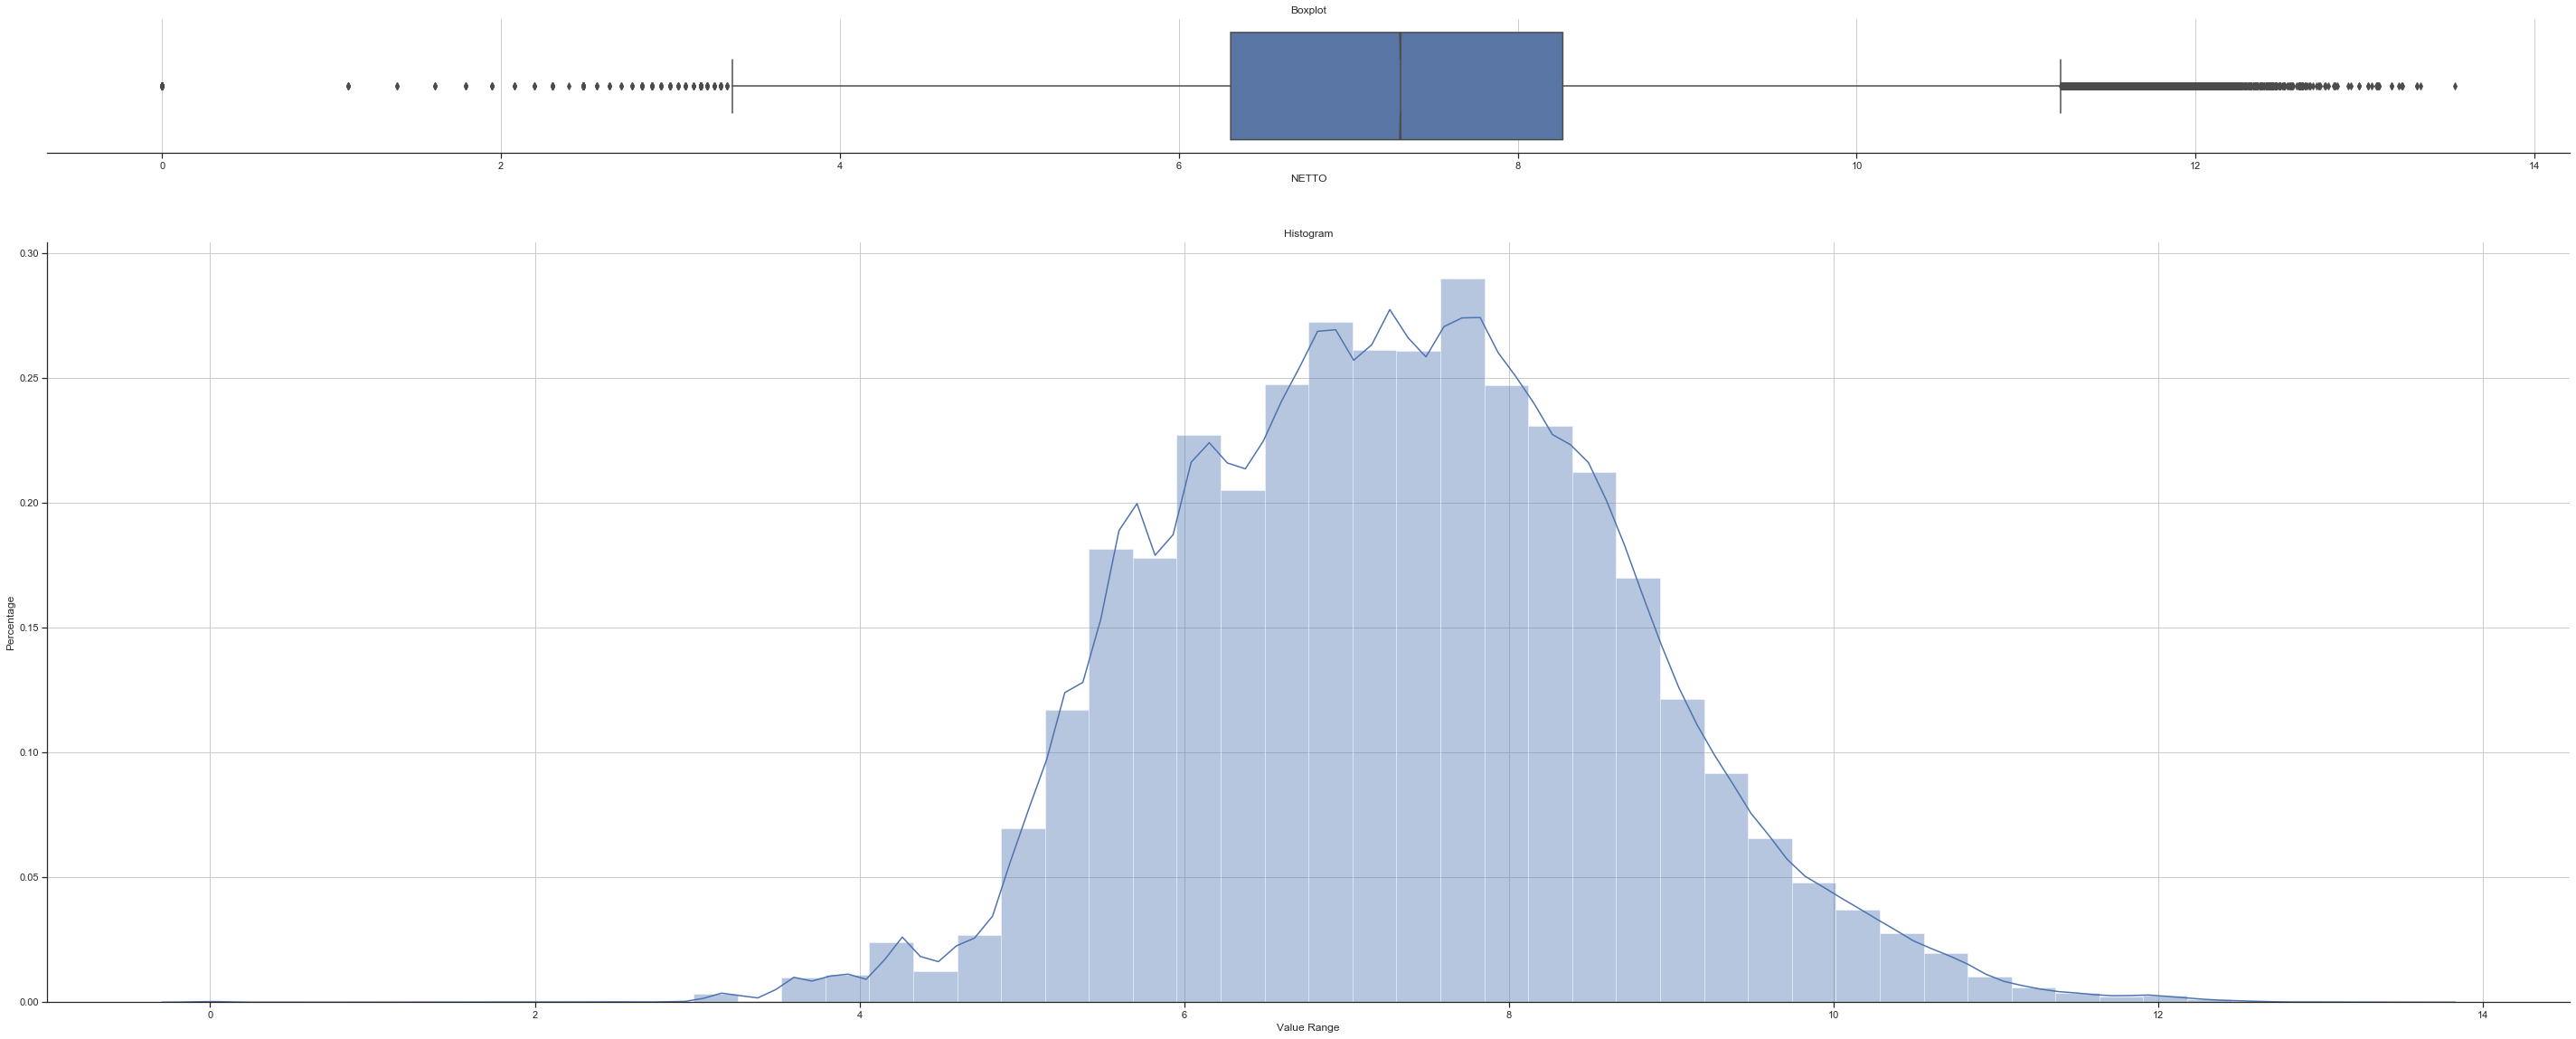

In [280]:
boxplot_histogram(
    np.log(
        bd_df_raw.loc[
            (bd_df_raw.KAMPAGNEN_STATUS != 3) & (bd_df_raw.NETTO > 0), "NETTO"
        ]
    ),
    figsize=(50, 20),
    bins=50,
)

In [ ]:
temp_df = bd_df_raw.loc[(bd_df_raw.KAMPAGNEN_STATUS != 3) & (bd_df_raw.NETTO >0),:]
temp_df.loc[:,"NETTO_log"] = np.log(temp_df.NETTO)

ordered_branches = temp_df.ENDKUNDE_BRANCHENGRUPPE.value_counts().index
g = sns.FacetGrid(
    temp_df,
    row="ENDKUNDE_BRANCHENGRUPPE",
    row_order=ordered_branches,
    height=10,
    aspect=2,
)
g.map(sns.distplot, "NETTO", hist=True, rug=False)
g.set(ylim=(0,0.0005))

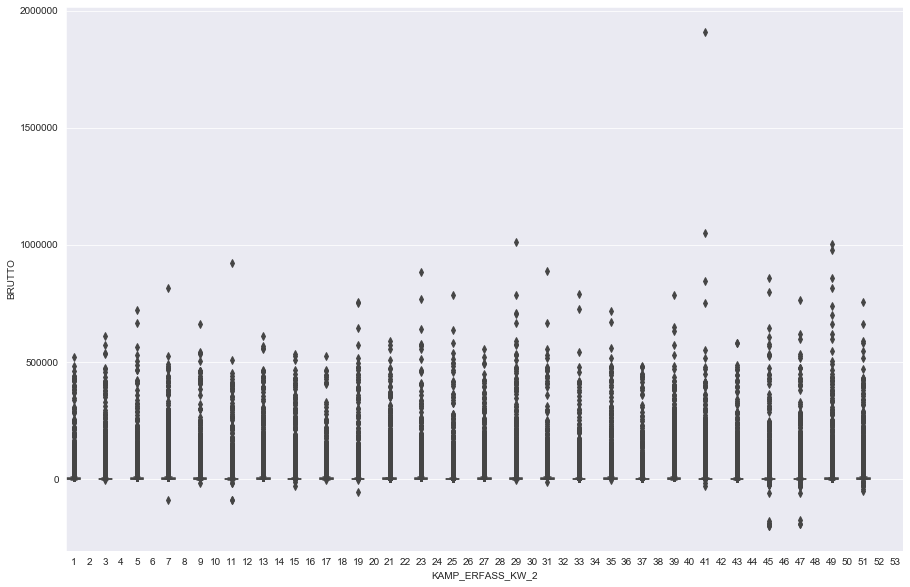

In [97]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(
    x="KAMP_ERFASS_KW_2",
#     y="NETTO",
    y="BRUTTO",
    data=bd_df_raw.loc[(bd_df_raw.KAMPAGNEN_STATUS != 3), :],
)

- Not gaussian distribution

## Test within each branch: are the nettos from year to year significantly different?

In [58]:
from scipy.stats import mannwhitneyu

In [75]:
import numpy as np

In [220]:
bd_subset_df = bd_df_raw.loc[
    (bd_df_raw.KAMPAGNEN_STATUS != 3)
    & (bd_df_raw.KAMP_ERFASS_JAHR > 2009)
    & (bd_df_raw.KAMP_ERFASS_JAHR < 2020),
    ["KAMP_ERFASS_JAHR", "NETTO", "ENDKUNDE_BRANCHENGRUPPE"],
].astype({"KAMP_ERFASS_JAHR": "int64"})

In [221]:
bd_subset_df.head(3)

,KAMP_ERFASS_JAHR,NETTO,ENDKUNDE_BRANCHENGRUPPE
207,2010,40000,WG - Ausbildung
208,2010,0,WG - Parteien
209,2010,0,WG - Parteien


In [222]:
desc_col(bd_subset_df)

,DTYPE,NULLS,UNIQUE
KAMP_ERFASS_JAHR,int64,0/1151126,10
NETTO,int64,0/1151126,31519
ENDKUNDE_BRANCHENGRUPPE,category,7118/1144008,83


In [223]:
test_mann = mannwhitneyu(
    np.random.normal(0, 1, 3000),
    np.random.normal(0.0001, 1, 3000),
    use_continuity=True,
    alternative="two-sided",
)

display(test_mann)

MannwhitneyuResult(statistic=4518196.0, pvalue=0.7862219095596706)

In [228]:
mann_df = []
branchenliste = list(set(bd_subset_df.ENDKUNDE_BRANCHENGRUPPE))[1:]


def mann_whitneyu_overmatrix(x, y):
    try:
        return mannwhitneyu(
            bd_subset_df.loc[
                (bd_subset_df.ENDKUNDE_BRANCHENGRUPPE == branche)
                & (bd_subset_df.KAMP_ERFASS_JAHR == x),
                "NETTO",
            ],
            bd_subset_df.loc[
                (bd_subset_df.ENDKUNDE_BRANCHENGRUPPE == branche)
                & (bd_subset_df.KAMP_ERFASS_JAHR == y),
                "NETTO",
            ],
            alternative="two-sided",
        )[1]
    except ValueError as e:
        return -1


for branche in branchenliste:
    # print(branche)
    test = list(
        set(
            bd_subset_df.loc[
                bd_subset_df.ENDKUNDE_BRANCHENGRUPPE == branche, "KAMP_ERFASS_JAHR"
            ]
        )
    )
    test.sort()
    tuples = [(x, y) for x in test for y in test if x < y]
    # print(test)
    # print(tuples)

    mann_tests = [mann_whitneyu_overmatrix(x, y) for (x, y) in tuples]

    mann_df += [mann_tests]

    # print(mann_tests)
mann_p_value_df = pd.DataFrame(mann_df, columns=tuples, index=branchenliste)

In [230]:
mann_p_value_df.shape

(83, 45)

In [240]:
#mann_p_value_df

In [236]:
def f_cat(x):
    if x <= 0:
        return -1
    elif x <= 0.05:
        return 0
    else:
        return 1
    

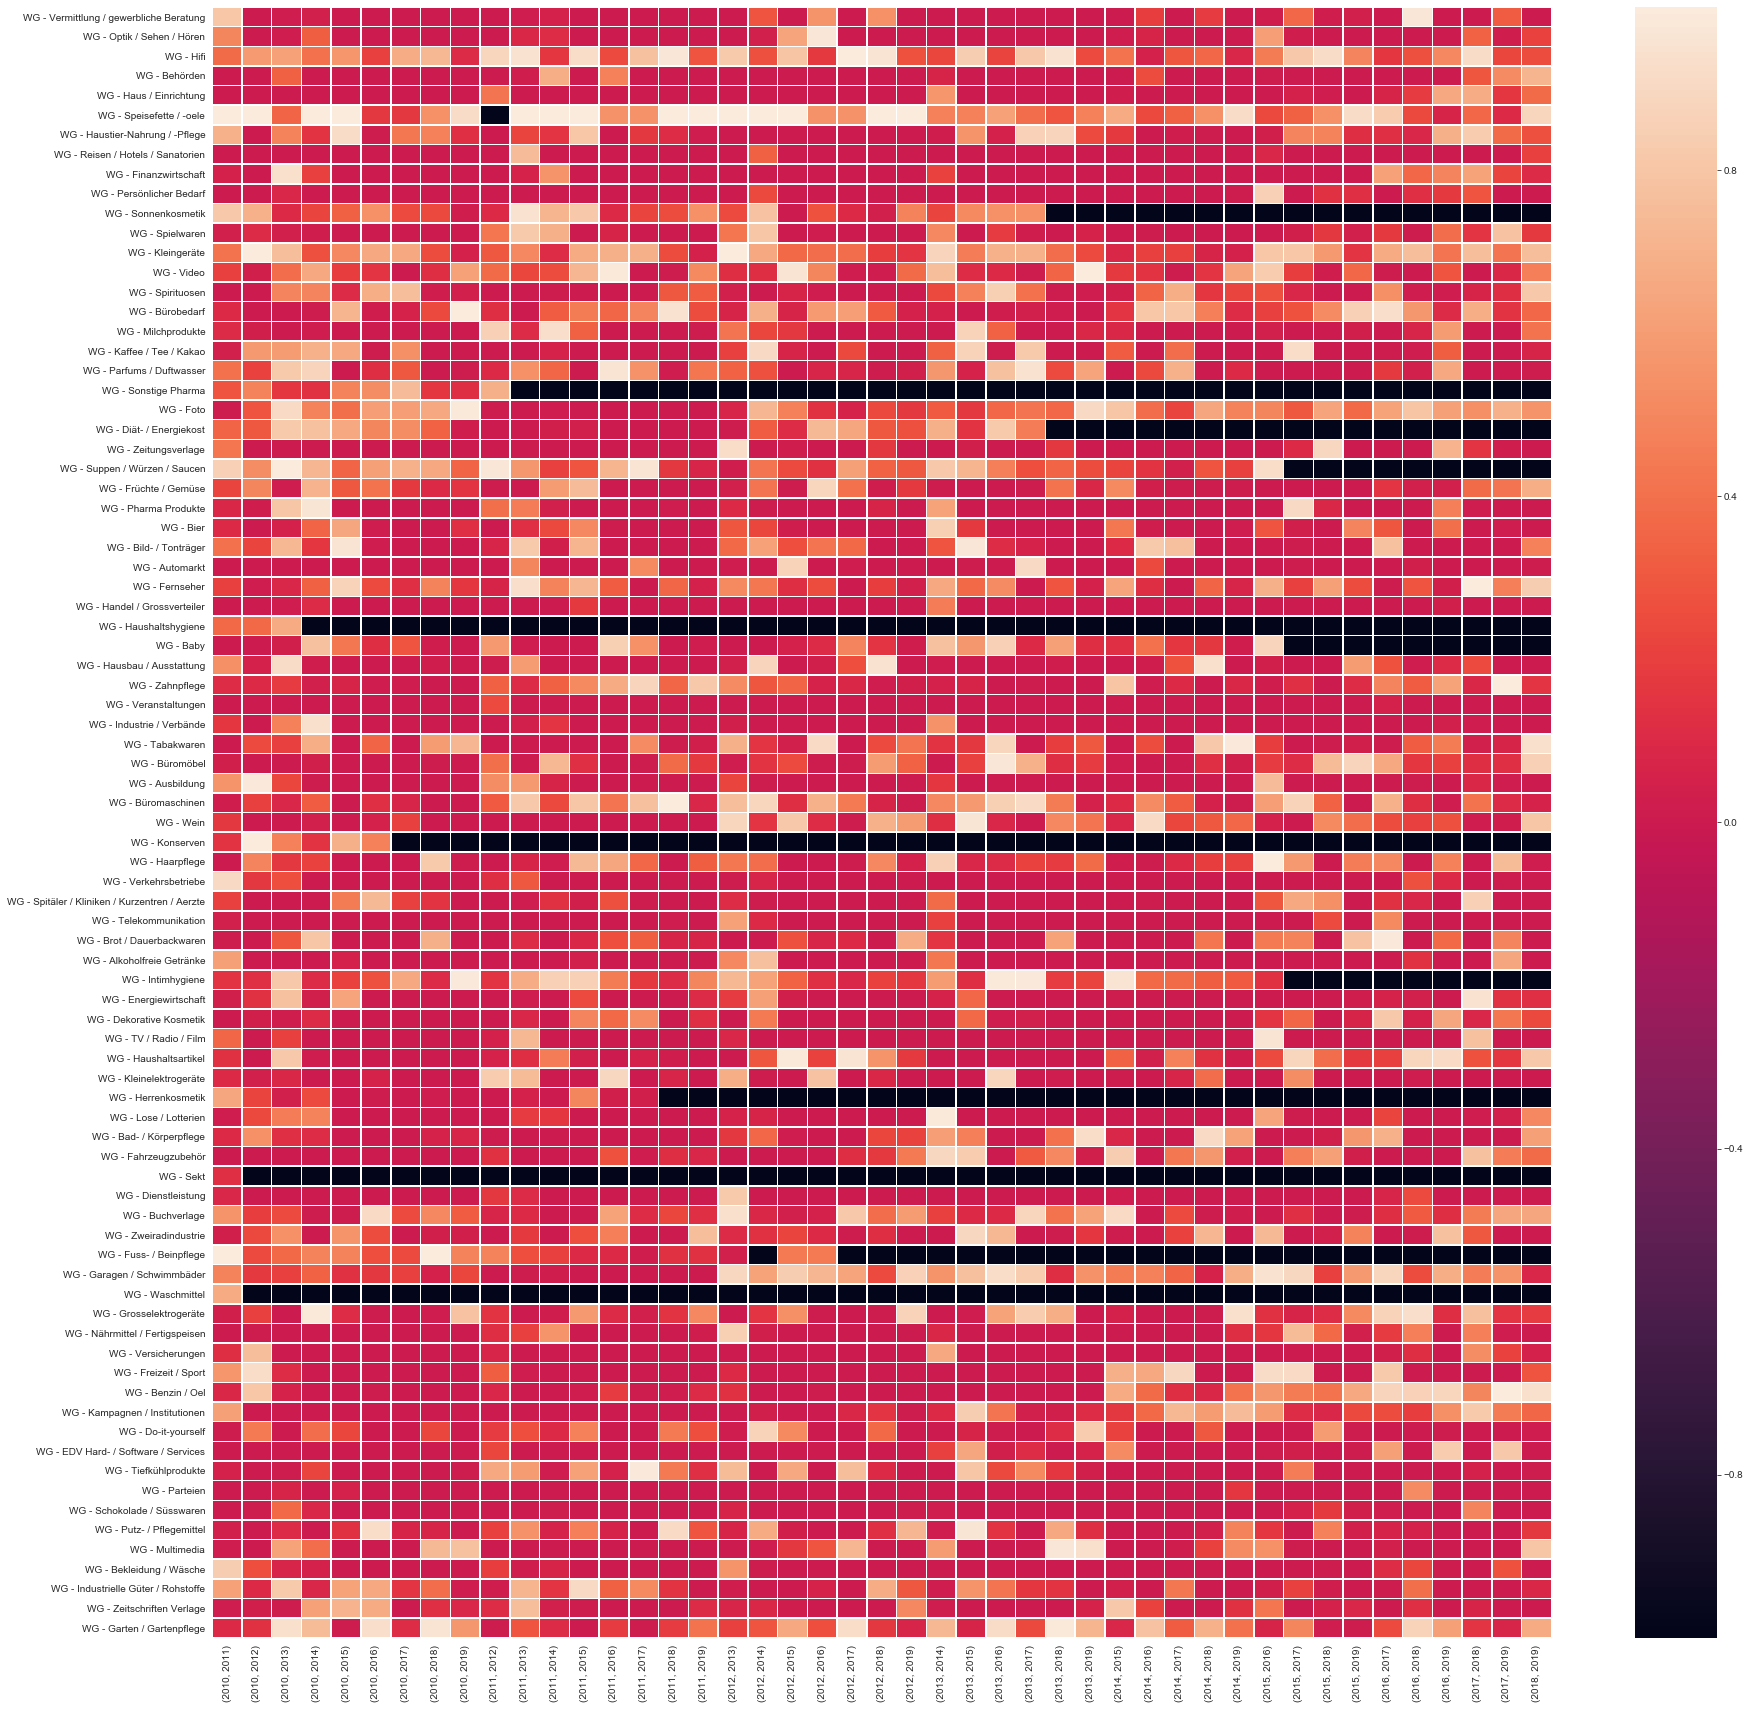

In [239]:
plt.figure(figsize=(30,30))
sns.heatmap(mann_p_value_df.fillna(-1).apply(lambda x: x) , linewidths=0.5)
fix_heatmap()

In [160]:
temp_df = bd_df_raw.loc[
    (bd_df_raw.KAMPAGNEN_STATUS != 3)
    & (bd_df_raw.BRUTTO > 0)
    & (bd_df_raw.NETTO > 10_000),
].astype({"ENDKUNDE_BRANCHENKAT": str})
temp_df.loc[:, "BRUTTO_log"] = np.log(temp_df.BRUTTO)
temp_df.loc[:, "NETTO_log"] = np.log(temp_df.NETTO)

Text(0.5, 1.0, "NETTOs pro Kampagne (nur >10'000)")

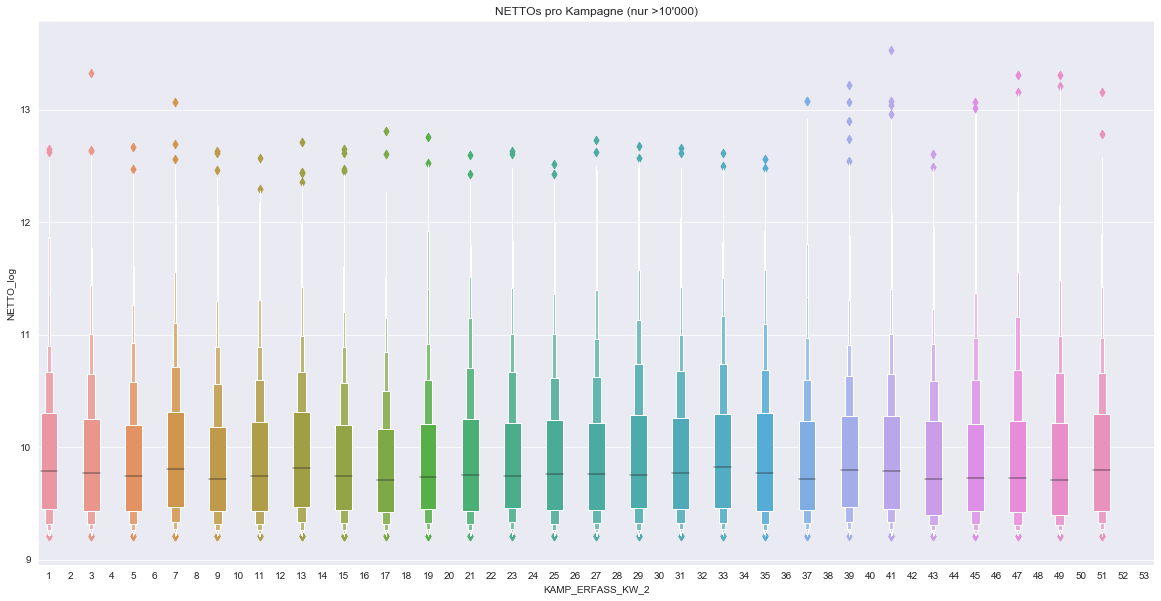

In [242]:
plt.figure(figsize=(20,10))

ax = sns.boxenplot(
    x="KAMP_ERFASS_KW_2",
#     y="NETTO",
    y="NETTO_log",
    data=temp_df,
)
#plt.ylim(5_000,125_000)
plt.title("NETTOs pro Kampagne (nur >10'000)")

In [ ]:
# plt.figure(figsize=(50, 10))

# lmplot doesn't like dates
g = sns.lmplot(
    # ="KAMPAGNE_ERFASSUNGSDATUM",
    x="KAMP_ERFASS_KW",
    y="NETTO",
    hue="KAMP_ERFASS_JAHR",
    data=temp_df,
    col="ENDKUNDE_BRANCHENKAT",
    height=8,
    col_wrap=2,
)
g.set(xlim=(-1,54),ylim=(0,5*10**5))


In [136]:
temp_df.columns

Index(['ENDKUNDE_NR', 'ENDKUNDE', 'EK_ABC', 'EK_BONI', 'EK_PLZ', 'EK_ORT',
       'EK_LAND', 'EK_HB_APG_KURZZ', 'EK_KAM_BETREUT', 'EK_AKTIV', 'AGENTUR',
       'AG_HAUPTBETREUER', 'VERKAUFSBERATER', 'ENDKUNDE_BRANCHENGRUPPE_ID',
       'ENDKUNDE_BRANCHENGRUPPE', 'ENDKUNDE_NBRANCHENGRUPPE_ID',
       'ENDKUNDE_NBRANCHENGRUPPE', 'ENDKUNDE_BRANCHENKAT_ID',
       'ENDKUNDE_BRANCHENKAT', 'ENDKUNDE_NBRANCHENKAT_ID',
       'ENDKUNDE_NBRANCHENKAT', 'AUFTRAG_BRANCHENGRUPPE_ID',
       'AUFTRAG_BRANCHENGRUPPE', 'AUFTRAG_NBRANCHENGRUPPE_ID',
       'AUFTRAG_NBRANCHENGRUPPE', 'AUFTRAG_BRANCHENKAT_ID',
       'AUFTRAG_BRANCHENKAT', 'AUFTRAG_NBRANCHENKAT_ID',
       'AUFTRAG_NBRANCHENKAT', 'AGPS_NR', 'SEGMENT', 'KV_NR', 'KV_TYP',
       'KAMPAGNEN_STATUS', 'KAMPAGNE_ERFASSUNGSDATUM', 'KAMPAGNE_BEGINN',
       'AUFTRAGSART', 'RES_DAT', 'ANNULLATION_DATUM', 'AUSH_VON', 'DAUER',
       'VERTRAG', 'BRUTTO', 'NETTO', 'AGGLO', 'PF', 'KAMP_BEGINN_JAHR',
       'KAMP_BEGINN_KW', 'KAMP_BEGINN_KW_2', 'KAMP_

# Statsmodels TSA

https://www.statsmodels.org/stable/examples/index.html#time-series-analysis

In [171]:
from statsmodels.tsa.seasonal import seasonal_decompose, seasonal_mean

In [167]:
co2 = [315.58, 316.39, 316.79, 317.82, 318.39, 318.22, 316.68, 315.01, 314.02, 313.55,
       315.02, 315.75, 316.52, 317.10, 317.79, 319.22, 320.08, 319.70, 318.27, 315.99,
       314.24, 314.05, 315.05, 316.23, 316.92, 317.76, 318.54, 319.49, 320.64, 319.85,
       318.70, 316.96, 315.17, 315.47, 316.19, 317.17, 318.12, 318.72, 319.79, 320.68,
       321.28, 320.89, 319.79, 317.56, 316.46, 315.59, 316.85, 317.87, 318.87, 319.25,
       320.13, 321.49, 322.34, 321.62, 319.85, 317.87, 316.36, 316.24, 317.13, 318.46,
       319.57, 320.23, 320.89, 321.54, 322.20, 321.90, 320.42, 318.60, 316.73, 317.15,
       317.94, 318.91, 319.73, 320.78, 321.23, 322.49, 322.59, 322.35, 321.61, 319.24,
       318.23, 317.76, 319.36, 319.50, 320.35, 321.40, 322.22, 323.45, 323.80, 323.50,
       322.16, 320.09, 318.26, 317.66, 319.47, 320.70, 322.06, 322.23, 322.78, 324.10,
       324.63, 323.79, 322.34, 320.73, 319.00, 318.99, 320.41, 321.68, 322.30, 322.89,
       323.59, 324.65, 325.30, 325.15, 323.88, 321.80, 319.99, 319.86, 320.88, 322.36,
       323.59, 324.23, 325.34, 326.33, 327.03, 326.24, 325.39, 323.16, 321.87, 321.31,
       322.34, 323.74, 324.61, 325.58, 326.55, 327.81, 327.82, 327.53, 326.29, 324.66,
       323.12, 323.09, 324.01, 325.10, 326.12, 326.62, 327.16, 327.94, 329.15, 328.79,
       327.53, 325.65, 323.60, 323.78, 325.13, 326.26, 326.93, 327.84, 327.96, 329.93,
       330.25, 329.24, 328.13, 326.42, 324.97, 325.29, 326.56, 327.73, 328.73, 329.70,
       330.46, 331.70, 332.66, 332.22, 331.02, 329.39, 327.58, 327.27, 328.30, 328.81,
       329.44, 330.89, 331.62, 332.85, 333.29, 332.44, 331.35, 329.58, 327.58, 327.55,
       328.56, 329.73, 330.45, 330.98, 331.63, 332.88, 333.63, 333.53, 331.90, 330.08,
       328.59, 328.31, 329.44, 330.64, 331.62, 332.45, 333.36, 334.46, 334.84, 334.29,
       333.04, 330.88, 329.23, 328.83, 330.18, 331.50, 332.80, 333.22, 334.54, 335.82,
       336.45, 335.97, 334.65, 332.40, 331.28, 330.73, 332.05, 333.54, 334.65, 335.06,
       336.32, 337.39, 337.66, 337.56, 336.24, 334.39, 332.43, 332.22, 333.61, 334.78,
       335.88, 336.43, 337.61, 338.53, 339.06, 338.92, 337.39, 335.72, 333.64, 333.65,
       335.07, 336.53, 337.82, 338.19, 339.89, 340.56, 341.22, 340.92, 339.26, 337.27,
       335.66, 335.54, 336.71, 337.79, 338.79, 340.06, 340.93, 342.02, 342.65, 341.80,
       340.01, 337.94, 336.17, 336.28, 337.76, 339.05, 340.18, 341.04, 342.16, 343.01,
       343.64, 342.91, 341.72, 339.52, 337.75, 337.68, 339.14, 340.37, 341.32, 342.45,
       343.05, 344.91, 345.77, 345.30, 343.98, 342.41, 339.89, 340.03, 341.19, 342.87,
       343.74, 344.55, 345.28, 347.00, 347.37, 346.74, 345.36, 343.19, 340.97, 341.20,
       342.76, 343.96, 344.82, 345.82, 347.24, 348.09, 348.66, 347.90, 346.27, 344.21,
       342.88, 342.58, 343.99, 345.31, 345.98, 346.72, 347.63, 349.24, 349.83, 349.10,
       347.52, 345.43, 344.48, 343.89, 345.29, 346.54, 347.66, 348.07, 349.12, 350.55,
       351.34, 350.80, 349.10, 347.54, 346.20, 346.20, 347.44, 348.67]
co2 = pd.Series(co2, index=pd.date_range('1-1-1959', periods=len(co2), freq='M'), name = 'CO2')
co2.describe()

count    348.000000
mean     330.123879
std       10.059747
min      313.550000
25%      321.302500
50%      328.820000
75%      338.002500
max      351.340000
Name: CO2, dtype: float64

In [172]:
stl = seasonal_mean(co2, seasonal=13)

TypeError: seasonal_mean() got an unexpected keyword argument 'seasonal'